In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')


<Axes: xlabel='survived', ylabel='fare'>

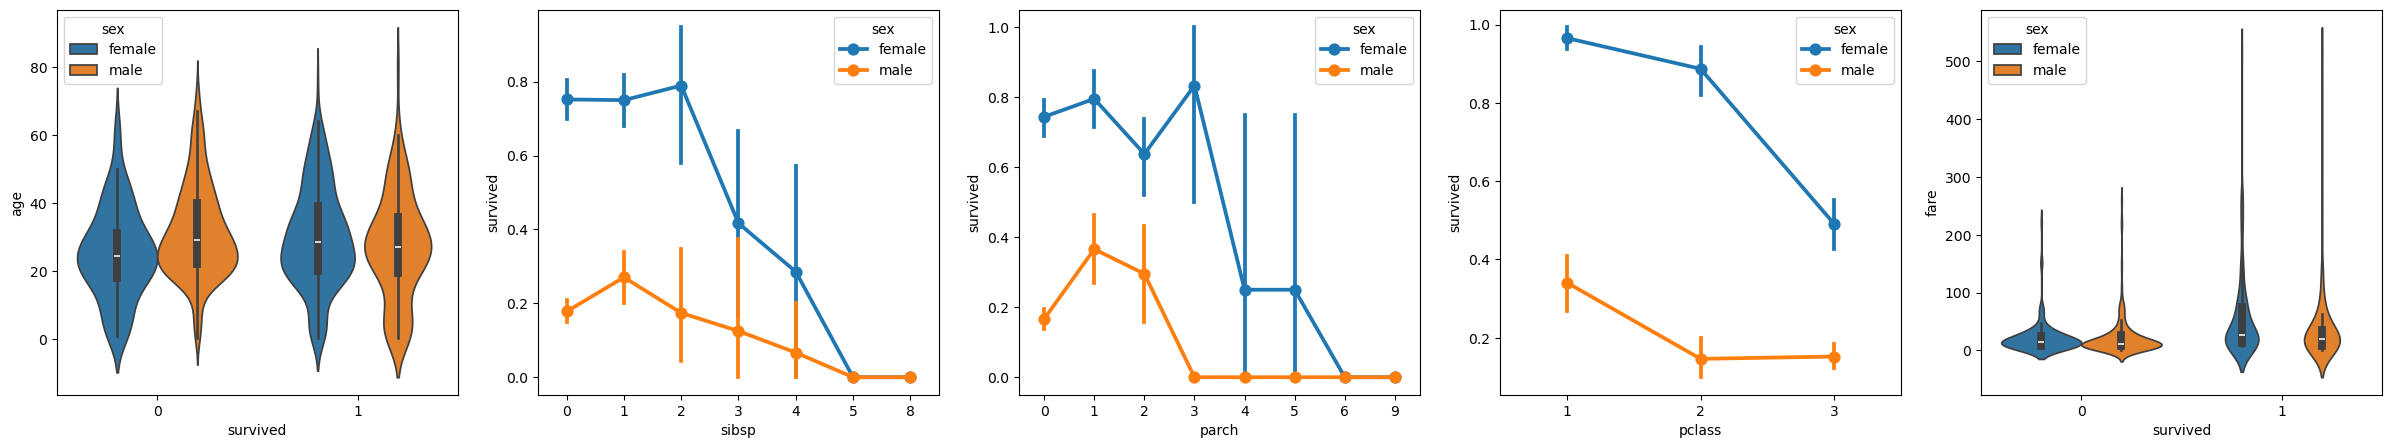

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])


In [5]:
data.replace({'male': 1, 'female': 0}, inplace=True)


C:\Users\jarmo\AppData\Local\Temp\ipykernel_18676\761646214.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


In [6]:
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [7]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [20]:
# use this if you want to choose specific columns for example to skip body that is not needed.

data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)

columns_to_check = ['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'relatives']

corr_matrix = data[columns_to_check].corr()

corr_with_survived = corr_matrix[['survived']].abs()

print(corr_with_survived)

           survived
pclass     0.312469
survived   1.000000
sex        0.528693
age        0.055512
sibsp      0.027825
parch      0.082660
fare       0.244265
relatives  0.201719


In [23]:
%run script.py